In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
import pandas as pd
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
   
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# Convert the array of dictionaries to a Pandas DataFrame.
#city_data_df = pd.DataFrame(city_data)
#city_data_df

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | plettenberg bay
{'coord': {'lon': 23.37, 'lat': -34.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50.45, 'feels_like': 44.89, 'temp_min': 50.45, 'temp_max': 50.45, 'pressure': 1024, 'humidity': 66, 'sea_level': 1024, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 324}, 'clouds': {'all': 1}, 'dt': 1597868175, 'sys': {'country': 'ZA', 'sunrise': 1597813259, 'sunset': 1597852771}, 'timezone': 7200, 'id': 964712, 'name': 'Plettenberg Bay', 'cod': 200}
Processing Record 2 of Set 1 | hithadhoo
{'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.85, 'feels_like': 90.1, 'temp_min': 82.85, 'temp_max': 82.85, 'pressure': 1009, 'humidity': 70, 'sea_level': 1009, 'grnd_level': 1009}, 

{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 79.86, 'temp_min': 73.99, 'temp_max': 81, 'pressure': 1018, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1597868179, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1597852928, 'sunset': 1597898749}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
Processing Record 16 of Set 1 | jamestown
{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 68.52, 'feels_like': 64.18, 'temp_min': 66.2, 'temp_max': 70, 'pressure': 1019, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1597868179, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1597832971, 

{'coord': {'lon': -50.21, 'lat': -30.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.26, 'feels_like': 48.88, 'temp_min': 58.26, 'temp_max': 58.26, 'pressure': 1017, 'humidity': 77, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 17.31, 'deg': 199}, 'clouds': {'all': 54}, 'dt': 1597868183, 'sys': {'country': 'BR', 'sunrise': 1597830623, 'sunset': 1597870720}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
Processing Record 33 of Set 1 | mawlaik
{'coord': {'lon': 94.42, 'lat': 23.63}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.4, 'feels_like': 84.45, 'temp_min': 75.4, 'temp_max': 75.4, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 996}, 'visibility': 2533, 'wind': {'speed': 1.14, 'deg': 58}, 'rain': {'1h': 1.54}, 'clouds': {'all': 100}, 'dt': 15

{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46, 'feels_like': 39.56, 'temp_min': 46, 'temp_max': 46, 'pressure': 1030, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 180, 'gust': 17}, 'clouds': {'all': 70}, 'dt': 1597868187, 'sys': {'type': 3, 'id': 2030260, 'country': 'AR', 'sunrise': 1597834530, 'sunset': 1597872952}, 'timezone': -10800, 'id': 3832899, 'name': 'Viedma', 'cod': 200}
Processing Record 48 of Set 1 | vaini
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 81.14, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1014, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1597868187, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'su

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.2, 'feels_like': 48.74, 'temp_min': 51.01, 'temp_max': 55, 'pressure': 1026, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1597868191, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1597814437, 'sunset': 1597853969}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
Processing Record 13 of Set 2 | new norfolk
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 43.66, 'feels_like': 39.96, 'temp_min': 41, 'temp_max': 46, 'pressure': 987, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 3.06, 'deg': 289}, 'rain': {'1h': 0.31}, 'clouds': {'all': 94}, 'dt': 1597868191, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', '

{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 83.05, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1014, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1597868195, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1597825916, 'sunset': 1597868483}, 'timezone': -10800, 'id': 3395981, 'name': 'Maceió', 'cod': 200}
Processing Record 28 of Set 2 | lata
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.62, 'feels_like': 76.53, 'temp_min': 70, 'temp_max': 75.99, 'pressure': 1006, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 222, 'gust': 20}, 'clouds': {'all': 2}, 'dt': 1597868195, 'sys': {'type': 3, 'id': 2013564, 'country': 'PT', 'sunrise': 1597816136,

{'coord': {'lon': -70.03, 'lat': 12.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 91.4, 'feels_like': 89.42, 'temp_min': 91.4, 'temp_max': 91.4, 'pressure': 1009, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1597868199, 'sys': {'type': 1, 'id': 8791, 'country': 'AW', 'sunrise': 1597832937, 'sunset': 1597877918}, 'timezone': -14400, 'id': 3577154, 'name': 'Oranjestad', 'cod': 200}
Processing Record 44 of Set 2 | ayan
{'coord': {'lon': 138.17, 'lat': 56.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.09, 'feels_like': 46.76, 'temp_min': 55.09, 'temp_max': 55.09, 'pressure': 1000, 'humidity': 67, 'sea_level': 1000, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 12.46, 'deg': 284}, 'clouds': {'all': 96}, 'dt': 1597868200, 'sys': {'country': 'RU', '

{'coord': {'lon': 12.92, 'lat': 18.69}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 96.93, 'feels_like': 91.22, 'temp_min': 96.93, 'temp_max': 96.93, 'pressure': 1004, 'humidity': 12, 'sea_level': 1004, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 4.88, 'deg': 86}, 'clouds': {'all': 23}, 'dt': 1597868203, 'sys': {'country': 'NE', 'sunrise': 1597812663, 'sunset': 1597858383}, 'timezone': 3600, 'id': 2446796, 'name': 'Bilma', 'cod': 200}
Processing Record 10 of Set 3 | narsaq
{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 52.72, 'temp_min': 59, 'temp_max': 59, 'pressure': 1020, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1597868204, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 159782193

{'coord': {'lon': -73.12, 'lat': -36.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 44.65, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1026, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1597868207, 'sys': {'type': 1, 'id': 8499, 'country': 'CL', 'sunrise': 1597836606, 'sunset': 1597875732}, 'timezone': -14400, 'id': 3870282, 'name': 'Talcahuano', 'cod': 200}
Processing Record 26 of Set 3 | soyo
{'coord': {'lon': 12.37, 'lat': -6.13}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.43, 'feels_like': 73.67, 'temp_min': 72.43, 'temp_max': 72.43, 'pressure': 1010, 'humidity': 88, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.18, 'deg': 225}, 'clouds': {'all': 43}, 'dt': 1597868207, 'sys': {'country': 'AO', 's

{'coord': {'lon': -111.83, 'lat': 41.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 92.75, 'feels_like': 89.1, 'temp_min': 91, 'temp_max': 93.99, 'pressure': 1019, 'humidity': 22}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1597868211, 'sys': {'type': 1, 'id': 4701, 'country': 'US', 'sunrise': 1597840835, 'sunset': 1597890081}, 'timezone': -21600, 'id': 5777544, 'name': 'Logan', 'cod': 200}
Processing Record 42 of Set 3 | ilulissat
{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 49.42, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1014, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1597868211, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1597819917, 'sun

{'coord': {'lon': -2.58, 'lat': 53.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.71, 'feels_like': 64.78, 'temp_min': 66, 'temp_max': 69.8, 'pressure': 994, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1597868215, 'sys': {'type': 1, 'id': 1399, 'country': 'GB', 'sunrise': 1597813072, 'sunset': 1597865413}, 'timezone': 3600, 'id': 2634739, 'name': 'Warrington', 'cod': 200}
Processing Record 7 of Set 4 | faya
{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.38, 'feels_like': 77.63, 'temp_min': 71.6, 'temp_max': 75.2, 'pressure': 1020, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 224}, 'clouds': {'all': 76}, 'dt': 1597868215, 'sys': {'type': 1, 'id': 7396, 'country': 'SA', 'sunrise': 1597805593, 'suns

{'coord': {'lon': -63.57, 'lat': 44.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.23, 'feels_like': 69.85, 'temp_min': 64.99, 'temp_max': 78.01, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 15.01, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1597867950, 'sys': {'type': 3, 'id': 47831, 'country': 'CA', 'sunrise': 1597828930, 'sunset': 1597878825}, 'timezone': -10800, 'id': 6324729, 'name': 'Halifax', 'cod': 200}
Processing Record 23 of Set 4 | huarmey
{'coord': {'lon': -78.15, 'lat': -10.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.05, 'feels_like': 61.61, 'temp_min': 67.05, 'temp_max': 67.05, 'pressure': 1013, 'humidity': 66, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 12.57, 'deg': 190}, 'clouds': {'all': 4}, 'dt': 1597868220, 'sys': {'country': 'PE

{'coord': {'lon': 114.6, 'lat': -28.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 48.51, 'temp_min': 50, 'temp_max': 50, 'pressure': 1020, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 160}, 'clouds': {'all': 99}, 'dt': 1597868224, 'sys': {'type': 1, 'id': 9522, 'country': 'AU', 'sunrise': 1597877339, 'sunset': 1597917680}, 'timezone': 28800, 'id': 2070998, 'name': 'Geraldton', 'cod': 200}
Processing Record 39 of Set 4 | la palma
{'coord': {'lon': -118.05, 'lat': 33.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.27, 'feels_like': 90.95, 'temp_min': 82, 'temp_max': 98.01, 'pressure': 1009, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1597868224, 'sys': {'type': 1, 'id': 4154, 'country': 'US', 'sunrise': 1597843047, 'sunse

{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.37, 'feels_like': 54.9, 'temp_min': 55, 'temp_max': 57.2, 'pressure': 1013, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1597868228, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1597803771, 'sunset': 1597858698}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
Processing Record 5 of Set 5 | bandarbeyla
{'coord': {'lon': 50.81, 'lat': 9.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.71, 'feels_like': 69.87, 'temp_min': 78.71, 'temp_max': 78.71, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 29.35, 'deg': 208}, 'clouds': {'all': 0}, 'dt': 1597868228, 'sys': {'country': 'SO', 'sunrise': 1597

{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.37, 'feels_like': 85.39, 'temp_min': 78.37, 'temp_max': 78.37, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 26}, 'clouds': {'all': 100}, 'dt': 1597868232, 'sys': {'country': 'ID', 'sunrise': 1597879919, 'sunset': 1597923965}, 'timezone': 25200, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}
Processing Record 23 of Set 5 | san luis
{'coord': {'lon': -66.34, 'lat': -33.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.34, 'feels_like': 32.54, 'temp_min': 45.34, 'temp_max': 45.34, 'pressure': 1031, 'humidity': 42, 'sea_level': 1031, 'grnd_level': 944}, 'visibility': 10000, 'wind': {'speed': 14.5, 'deg': 161}, 'clouds': {'all': 3}, 'dt': 1597867983, 'sys': {'coun

{'coord': {'lon': 59.53, 'lat': 22.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86.22, 'feels_like': 88.25, 'temp_min': 86.22, 'temp_max': 86.22, 'pressure': 998, 'humidity': 60, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 10.54, 'deg': 176}, 'clouds': {'all': 53}, 'dt': 1597868235, 'sys': {'country': 'OM', 'sunrise': 1597887649, 'sunset': 1597933799}, 'timezone': 14400, 'id': 286245, 'name': 'Sur', 'cod': 200}
Processing Record 38 of Set 5 | aitape
{'coord': {'lon': 142.35, 'lat': -3.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.48, 'feels_like': 80.91, 'temp_min': 76.48, 'temp_max': 76.48, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.88, 'deg': 180}, 'rain': {'1h': 0.28}, 'clouds': {'all': 23}, 'dt': 1597868235, 

{'coord': {'lon': 38.69, 'lat': 50.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.64, 'feels_like': 63.77, 'temp_min': 63.64, 'temp_max': 63.64, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 6.02, 'deg': 77}, 'clouds': {'all': 9}, 'dt': 1597868239, 'sys': {'country': 'RU', 'sunrise': 1597803590, 'sunset': 1597855088}, 'timezone': 10800, 'id': 582956, 'name': 'Alekseyevka', 'cod': 200}
Processing Record 3 of Set 6 | lavrentiya
{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.69, 'feels_like': 47.68, 'temp_min': 51.69, 'temp_max': 51.69, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 237}, 'clouds': {'all': 100}, 'dt': 1597868239, 'sys': {'co

{'coord': {'lon': 152.17, 'lat': -4.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.3, 'feels_like': 82.18, 'temp_min': 78.3, 'temp_max': 78.3, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.43, 'deg': 158}, 'clouds': {'all': 29}, 'dt': 1597868242, 'sys': {'country': 'PG', 'sunrise': 1597866912, 'sunset': 1597910076}, 'timezone': 36000, 'id': 2087894, 'name': 'Rabaul', 'cod': 200}
Processing Record 19 of Set 6 | lahij
{'coord': {'lon': 44.58, 'lat': 13.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 90.3, 'feels_like': 93.92, 'temp_min': 90.3, 'temp_max': 90.3, 'pressure': 1004, 'humidity': 46, 'sea_level': 1004, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 116}, 'clouds': {'all': 80}, 'dt': 1597868242, 'sys': {'country'

{'coord': {'lon': 8.06, 'lat': 6.63}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 91.27, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1007, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1597868245, 'sys': {'type': 1, 'id': 1157, 'country': 'NG', 'sunrise': 1597814525, 'sunset': 1597858853}, 'timezone': 3600, 'id': 2343985, 'name': 'Effium', 'cod': 200}
Processing Record 34 of Set 6 | petropavlovsk-kamchatskiy
{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 46.08, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1006, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 11.18, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1597868246, 'sys': {'type': 1, 'id': 8887, 'country

{'coord': {'lon': 8.83, 'lat': 63.73}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 56.57, 'feels_like': 56.73, 'temp_min': 55.99, 'temp_max': 57.2, 'pressure': 1007, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1597868249, 'sys': {'type': 1, 'id': 1647, 'country': 'NO', 'sunrise': 1597807900, 'sunset': 1597865108}, 'timezone': 7200, 'id': 3139597, 'name': 'Sistranda', 'cod': 200}
Processing Record 50 of Set 6 | suriapet
{'coord': {'lon': 79.62, 'lat': 17.15}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.77, 'feels_like': 78.73, 'temp_min': 74.77, 'temp_max': 74.77, 'pressure': 1003, 'humidity': 96, 'sea_level': 1003, 'grnd_level': 982}, 'visibility': 4293, 'wind': {'speed': 9.89, 'deg': 273}, 'rain': {'1h': 3.84}, 'clouds': {'all': 100}, 'dt': 159786824

{'coord': {'lon': -93.59, 'lat': 33.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.95, 'feels_like': 88.47, 'temp_min': 86, 'temp_max': 88, 'pressure': 1003, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 47, 'gust': 8.01}, 'clouds': {'all': 20}, 'dt': 1597868252, 'sys': {'type': 3, 'id': 2010718, 'country': 'US', 'sunrise': 1597837188, 'sunset': 1597884974}, 'timezone': -18000, 'id': 4115181, 'name': 'Hope', 'cod': 200}
Processing Record 16 of Set 7 | ebolowa


In [4]:

print(city_weather['weather'])
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mortka,59.33,66.02,50.72,99,99,5.23,RU,2020-08-18 00:55:40
1,Plettenberg Bay,-34.05,23.37,47.03,80,100,22.93,ZA,2020-08-18 00:55:41
2,Caravelas,-17.71,-39.25,72.12,86,0,6.17,BR,2020-08-18 00:55:43
3,Iranshahr,27.20,60.68,95.00,26,87,4.70,IR,2020-08-18 00:55:46
4,Athabasca,54.72,-113.29,80.04,65,73,4.09,CA,2020-08-18 00:52:11
...,...,...,...,...,...,...,...,...,...
546,Grootfontein,-19.57,18.12,51.55,39,0,15.73,NA,2020-08-18 00:58:48
547,Rorvik,64.86,11.24,54.55,82,0,13.73,NO,2020-08-18 00:58:48
548,Kichera,55.94,110.10,62.20,50,0,1.95,RU,2020-08-18 00:58:48
549,Peterhead,57.51,-1.80,57.20,100,90,2.24,GB,2020-08-18 00:58:49


In [5]:
new_order=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
city_data_df=city_data_df[new_order]
city_data_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mortka,99,RU,2020-08-18 00:55:40,99,59.33,66.02,50.72,5.23
1,Plettenberg Bay,100,ZA,2020-08-18 00:55:41,80,-34.05,23.37,47.03,22.93
2,Caravelas,0,BR,2020-08-18 00:55:43,86,-17.71,-39.25,72.12,6.17
3,Iranshahr,87,IR,2020-08-18 00:55:46,26,27.20,60.68,95.00,4.70
4,Athabasca,73,CA,2020-08-18 00:52:11,65,54.72,-113.29,80.04,4.09
...,...,...,...,...,...,...,...,...,...
546,Grootfontein,0,NA,2020-08-18 00:58:48,39,-19.57,18.12,51.55,15.73
547,Rorvik,0,NO,2020-08-18 00:58:48,82,64.86,11.24,54.55,13.73
548,Kichera,0,RU,2020-08-18 00:58:48,50,55.94,110.10,62.20,1.95
549,Peterhead,90,GB,2020-08-18 00:58:49,100,57.51,-1.80,57.20,2.24


In [6]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [8]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597712366.7661102

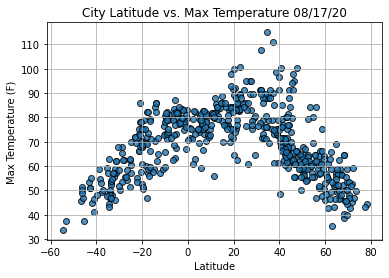

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

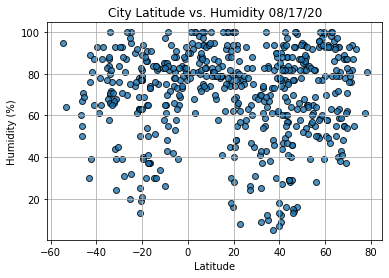

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

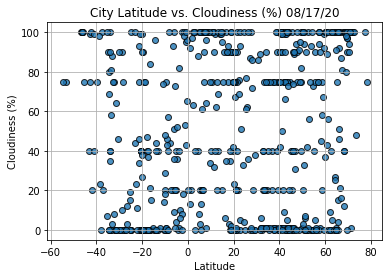

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

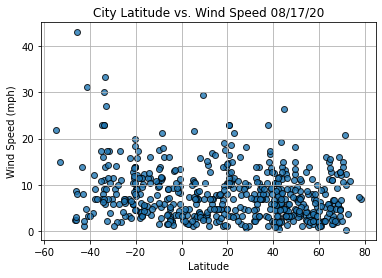

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


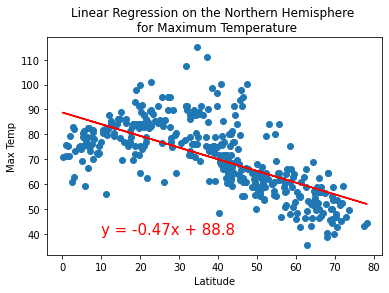

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

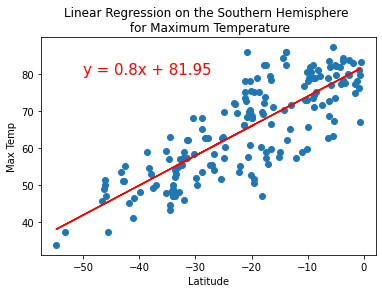

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

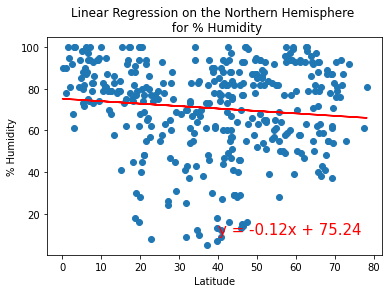

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

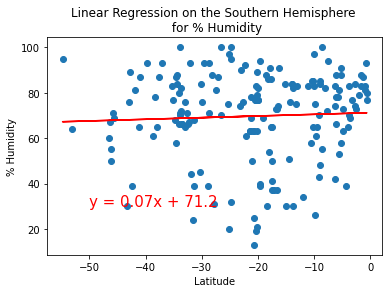

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

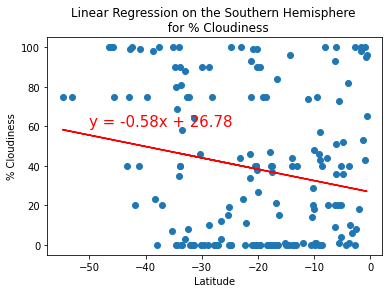

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Cloudiness', '% Cloudiness',(-50,60))

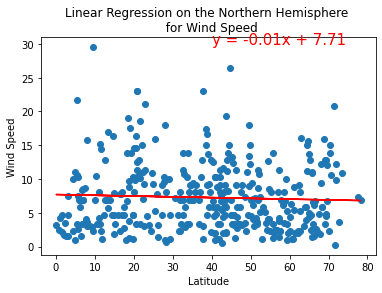

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for Wind Speed', 'Wind Speed',(40,30))

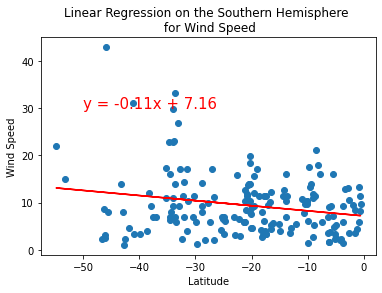

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

Figure(layout=FigureLayout(height='420px'))